In [50]:
import os, importlib, sys, time

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt

In [53]:
import freqepid

In [54]:
# save_dir = "result_ebcr"
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

# 0. parameters

In [55]:
GPi = np.load('data/GPi.npz')

In [56]:
param = pd.read_feather('data/param_ebcr_1.feather')
thetas = param.iloc[:,-3:].to_numpy()

In [57]:
regions = param.region.to_numpy()
num_region = len(regions)
d = thetas.shape[-1]-1

In [58]:
betas = thetas[:,-2:]

(array([ 2.,  6.,  6., 15., 15., 23., 12., 12.,  5.,  4.]),
 array([-3.21752544, -2.96559028, -2.71365513, -2.46171997, -2.20978481,
        -1.95784966, -1.7059145 , -1.45397934, -1.20204419, -0.95010903,
        -0.69817387]),
 <BarContainer object of 10 artists>)

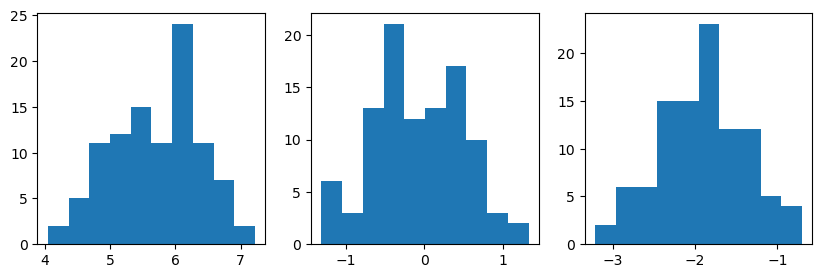

In [59]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.hist(thetas[:,0])
plt.subplot(1,3,2); plt.hist(thetas[:,1])
plt.subplot(1,3,3); plt.hist(thetas[:,2])

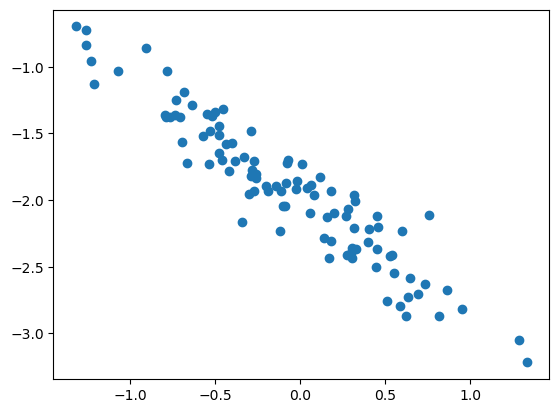

In [60]:
plt.scatter(thetas[:,1], thetas[:,2])

# 1. data

In [61]:
data = pd.read_feather('data/simulation_ebcr_1.feather')

In [62]:
data

region  date         R           EI    infection        EY  death  \
0        aa     0  4.190815  1387.980437  1387.980437  3.166483      1   
1        aa     1  4.190815  1469.145966  1469.145966  3.187928      2   
2        aa     2  4.190815  1770.304230  1770.304230  3.207031      1   
3        aa     3  4.190815  2267.440504  2267.440504  3.225412      2   
4        aa     4  4.190815  2945.675941  2945.675941  3.247837      3   
...     ...   ...       ...          ...          ...       ...    ...   
5926     dv    57  0.571112    29.445024    29.445024  1.873777      3   
5927     dv    58  0.571112    27.371699    27.371699  1.759526      3   
5928     dv    59  0.571112    25.444364    25.444364  1.650705      0   
5929     dv    60  0.571112    23.652739    23.652739  1.546948      2   
5930     dv    61  0.571112    21.987269    21.987269  1.448587      1   

      intervention  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
5926             1  
5927             1  
5928             1  
5929             1  
5930             1  

[5931 rows x 8 columns]

# 2. fit

In [63]:
model = freqepid.Model(GPi['g'], GPi['pi'], T0=40, family='nbinom')

In [64]:
ns_mle = np.zeros(num_region)
ms_mle = np.zeros(num_region)
bs_mle = np.zeros((num_region,d))
Vs_mle = np.zeros((num_region,d+2,d+2))

In [65]:
for i_region, r in enumerate(regions):
    start_sim = time.time()
    
    data_i = data[data['region']==r]
    T = len(data_i)
    A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
    Y = data_i["death"].to_numpy()
    
    # fit
    nmle, mmle, bmle, ll =\
    model.fit(A, Y, n_iter=200, step_size=1,
              history=False, verbose=False)
    
    ns_mle[i_region] = nmle
    ms_mle[i_region] = mmle
    bs_mle[i_region,:] = bmle

#     nmle = ns_mle[i_region]
#     mmle = ms_mle[i_region]
#     bmle = bs_mle[i_region,:]
    
    Ihat_dth, Ihat_hac, Ihat_sdw =\
    model.inference(A, Y, nmle, mmle, bmle)
    
    Vs_mle[i_region] = la.pinv(Ihat_dth)
    
    sys.__stdout__.write("%d-th region finished, %f sec.\n"
                         %(i_region+1, time.time()-start_sim))
    sys.__stdout__.flush()

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


1-th region finished, 1.297323 sec.


/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:146: RuntimeWarning: divide by zero encountered in log
  log_err_ratio = np.log(Y / self.predict_EY(A, 0, binit))


2-th region finished, 1.346237 sec.
3-th region finished, 1.672326 sec.
4-th region finished, 1.096899 sec.
5-th region finished, 1.177800 sec.
6-th region finished, 1.370145 sec.
7-th region finished, 1.031284 sec.
8-th region finished, 1.608733 sec.
9-th region finished, 1.473529 sec.
10-th region finished, 1.324413 sec.
11-th region finished, 1.132489 sec.
12-th region finished, 1.323869 sec.
13-th region finished, 1.195916 sec.
14-th region finished, 1.144276 sec.
15-th region finished, 1.077049 sec.
16-th region finished, 1.289628 sec.
17-th region finished, 1.349840 sec.
18-th region finished, 2.208272 sec.
19-th region finished, 2.083758 sec.
20-th region finished, 1.401195 sec.
21-th region finished, 1.473526 sec.
22-th region finished, 1.574206 sec.
23-th region finished, 1.313747 sec.
24-th region finished, 1.607838 sec.
25-th region finished, 1.624232 sec.
26-th region finished, 2.055966 sec.
27-th region finished, 1.063580 sec.
28-th region finished, 1.281637 sec.
29-th reg

In [66]:
np.savez('result_freqepi_ebcr_1.npz',
         ns_mle = ns_mle, ms_mle = ms_mle, 
         bs_mle = bs_mle, Vs_mle = Vs_mle)

## plot

In [67]:
# locals().update(np.load('simulation_freqepi_ebcr1.npz'))

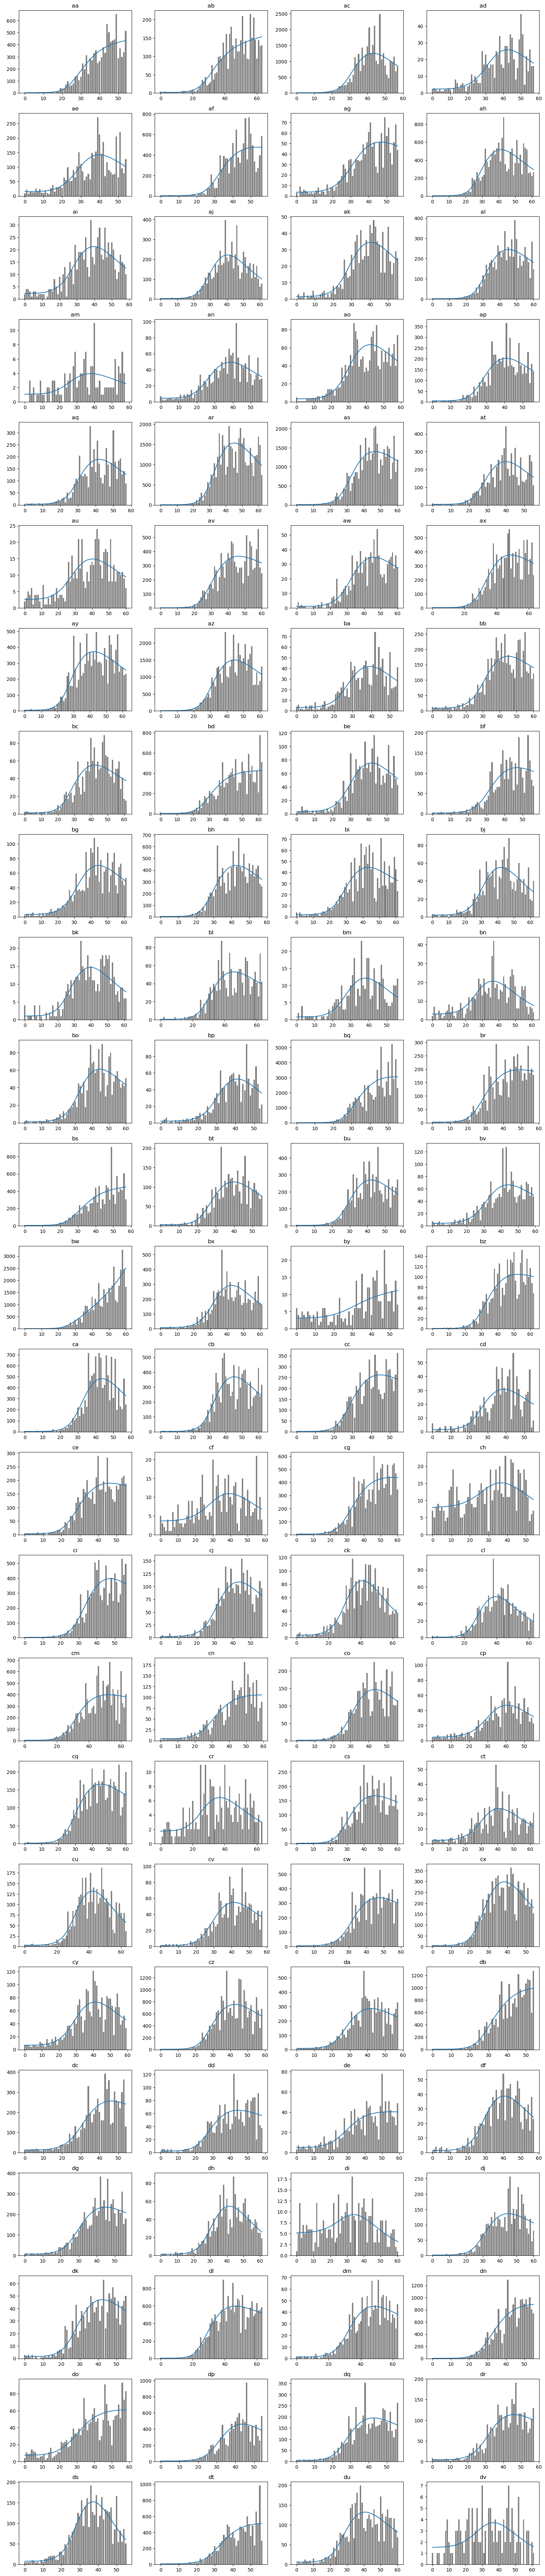

In [68]:
plt.figure(figsize=(16, int(num_region/4+1)*3))

for i, r in enumerate(regions):
    plt.subplot(int(num_region/4+1),4,i+1)
    
    Y = np.array(data[data.region == r].death)
    T = Y.shape[0]
    
    A = np.zeros([T, d])
    A[:,0] = np.full(T, 1)
    A[:,1:] = np.array(data[data.region == r].intervention)[:,None]

    plt.bar(np.arange(T), Y, color='grey')
    plt.plot(model.predict_EY(A, ms_mle[i], bs_mle[i]))
    plt.title('%s'%r)
    
plt.tight_layout()

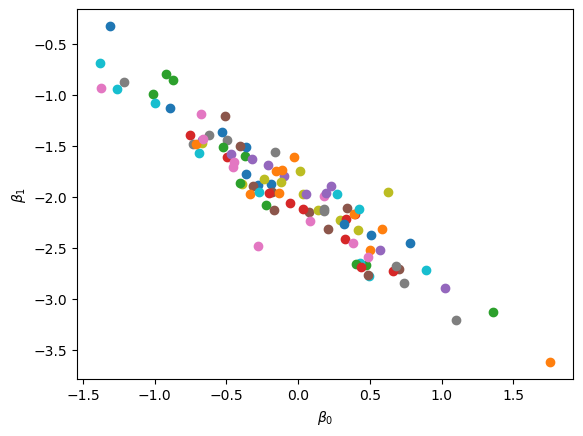

In [69]:
for i_region, (beta, bmle, Vmle) \
in enumerate(zip(betas, bs_mle, Vs_mle)):
    p = plt.scatter(*bmle, label="%d"%i_region)
#     plt.arrow(*beta, *(bmle-beta), width=0.01, 
#               length_includes_head=True,
#               color=p.get_facecolor(), alpha=1)
#     freqepid.confidence_ellipse(
#         bmle, Vmle[2:,2:], n_std=np.sqrt(stats.chi2(2).ppf(0.95)),
#         facecolor=p.get_facecolor(), alpha=0.3)
plt.xlabel(r"$\beta_0$"); plt.ylabel(r"$\beta_1$"); # plt.legend()

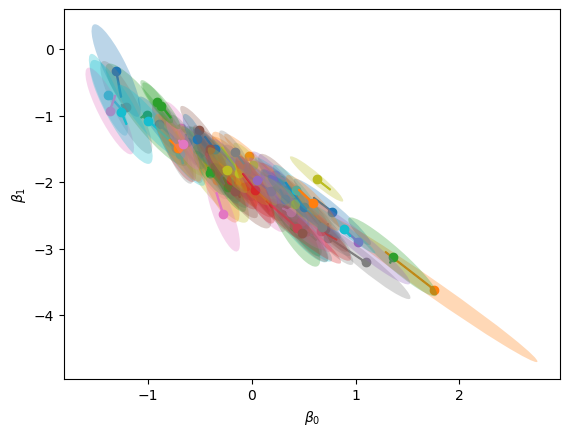

In [70]:
for i_region, (beta, bmle, Vmle) \
in enumerate(zip(betas, bs_mle, Vs_mle)):
    p = plt.scatter(*bmle, label="%d"%i_region)
    plt.arrow(*beta, *(bmle-beta), width=0.01, 
              length_includes_head=True,
              color=p.get_facecolor(), alpha=1)
    freqepid.confidence_ellipse(
        bmle, Vmle[2:,2:], n_std=np.sqrt(stats.chi2(2).ppf(0.95)),
        facecolor=p.get_facecolor(), alpha=0.3)
plt.xlabel(r"$\beta_0$"); plt.ylabel(r"$\beta_1$"); # plt.legend()

In [71]:
X2_mle = ((bs_mle - betas)[:,None,:] @ np.linalg.pinv(Vs_mle[:,2:,2:]) @ (bs_mle - betas)[:,:,None])[:,0,0]

In [72]:
np.mean(X2_mle < stats.chi2(2).ppf(0.95))

0.96

# 3. EBCR

In [73]:
thats = np.concatenate([ms_mle[:,None], bs_mle], -1)
covs = Vs_mle[:,1:,1:]

In [74]:
result_ebcr = freqepid.EBCR(thats, covs, num_mc=1000, weights=np.full(100, 1))

In [75]:
ths_eb = result_ebcr.ths_eb

In [76]:
covs_eb = result_ebcr.covs_eb

In [77]:
chi_pa = result_ebcr.chi_pa(0.05)

## plots

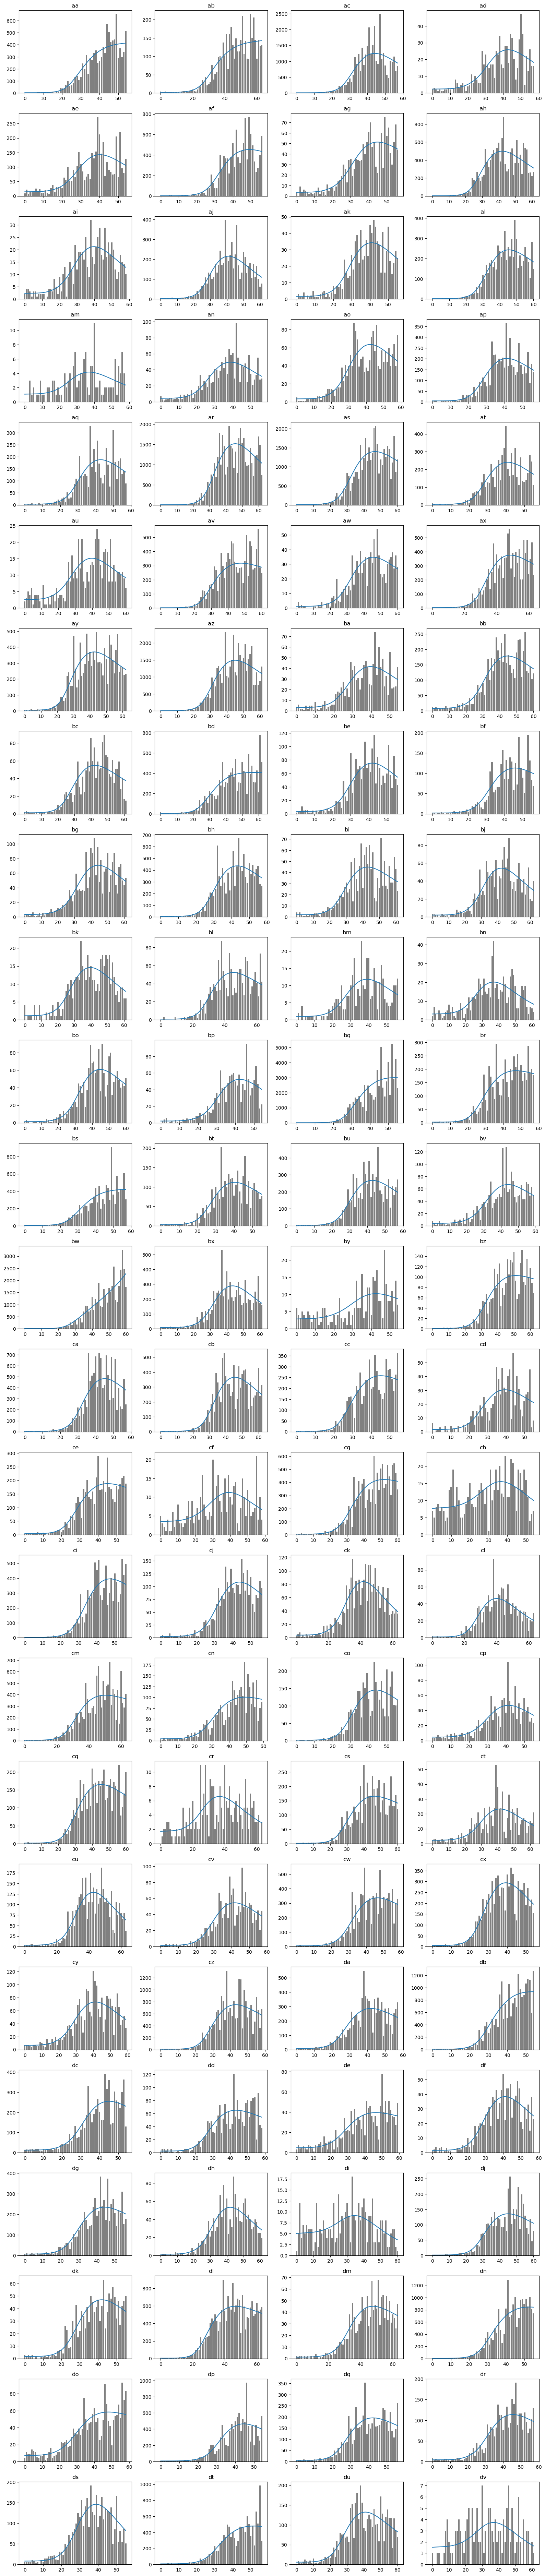

In [78]:
plt.figure(figsize=(16, int(num_region/4+1)*3))

for i, r in enumerate(regions):
    plt.subplot(int(num_region/4+1),4,i+1)
    
    Y = np.array(data[data.region == r].death)
    T = Y.shape[0]
    
    A = np.zeros([T, d])
    A[:,0] = np.full(T, 1)
    A[:,1:] = np.array(data[data.region == r].intervention)[:,None]

    plt.bar(np.arange(T), Y, color='grey')
    plt.plot(model.predict_EY(A, ths_eb[i,0], ths_eb[i,1:]))
    plt.title('%s'%r)
    
plt.tight_layout()

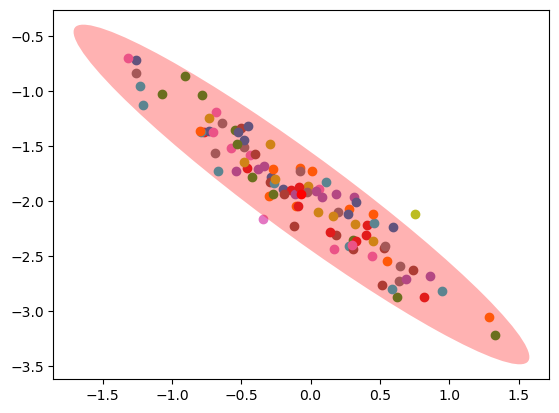

In [79]:
for i_region, beta in enumerate(betas):
    p = plt.scatter(*beta)
    
p = plt.scatter(*result_ebcr.th_o[1:], color='red')
freqepid.confidence_ellipse(
    result_ebcr.th_o[1:], result_ebcr.Phi2[1:,1:], n_std = chi_pa,
    facecolor=p.get_facecolor(), alpha=0.3)

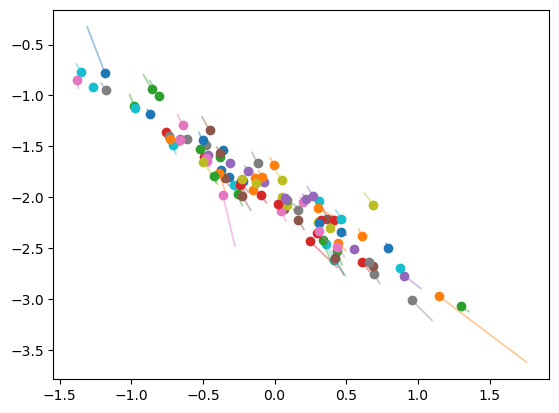

In [80]:
for i, r in enumerate(regions):
    p = plt.scatter(*ths_eb[i,1:])
    plt.arrow(*thats[i,1:], *(ths_eb[i,1:]-thats[i,1:]), width=0.005, 
             length_includes_head=True,
             color=p.get_facecolor(), alpha=0.3)

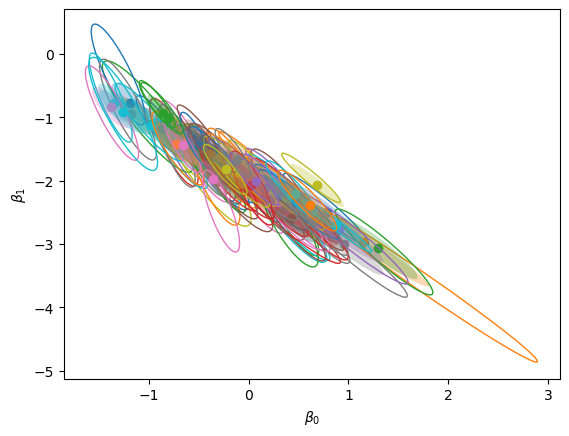

In [81]:
for i, r in enumerate(regions):
    p = plt.scatter(ths_eb[i,1], ths_eb[i,2])
    freqepid.confidence_ellipse(
        ths_eb[i,1:], covs_eb[i,1:,1:], n_std = chi_pa,
        facecolor=p.get_facecolor(), alpha=0.3)
    freqepid.confidence_ellipse(
        thats[i,1:], covs[i,1:,1:], n_std = chi_pa,
        edgecolor=p.get_facecolor(), facecolor='none', alpha=1)
plt.xlabel(r"$\beta_0$"); plt.ylabel(r"$\beta_1$"); #plt.legend(loc=(1.02,0))

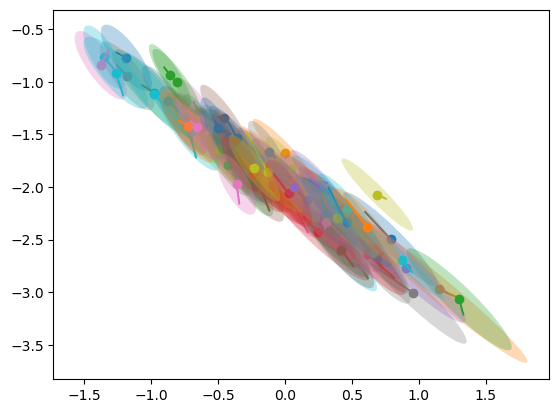

In [82]:
for i_region, (beta, th_eb, cov_eb) in enumerate(zip(betas, ths_eb, covs_eb)):
    p = plt.scatter(*(th_eb[1:]))
    plt.arrow(*beta, *(th_eb[1:]-beta), width=0.005, 
              length_includes_head=True,
              color=p.get_facecolor(), alpha=1)
    freqepid.confidence_ellipse(
        th_eb[1:], cov_eb[1:,1:], n_std = chi_pa,
        facecolor=p.get_facecolor(), alpha=0.3)

In [83]:
X2_eb = ((ths_eb[:,1:] - betas)[:,None,:] @ np.linalg.pinv(covs_eb[:,1:,1:]) @ (ths_eb[:,1:] - betas)[:,:,None])[:,0,0]

In [84]:
np.mean(X2_eb < result_ebcr.chi_pa(0.05)**2)

0.95

## robust CR

In [85]:
rho_pa = np.zeros(num_region)
rho_l = np.zeros(num_region)

In [86]:
for i, r in enumerate(regions):
    start_iter = time.time()
    
    rho_pa[i] = result_ebcr.cv.rho(chi_pa, result_ebcr.m2s[i],
                                   result_ebcr.m4s[i]+1e-2)['alpha']
    
    rho_l[i] = result_ebcr.cv.rho_l(chi_pa, result_ebcr.m2s[i],
                                    result_ebcr.m4s[i])['alpha']
    
    print("region %d finished, lapse: %.2f sec."
          %(i, time.time()-start_iter))

region 0 finished, lapse: 0.34 sec.
region 1 finished, lapse: 0.30 sec.
region 2 finished, lapse: 0.45 sec.
region 3 finished, lapse: 0.47 sec.
region 4 finished, lapse: 0.49 sec.
region 5 finished, lapse: 0.44 sec.
region 6 finished, lapse: 0.46 sec.
region 7 finished, lapse: 0.29 sec.
region 8 finished, lapse: 0.46 sec.
region 9 finished, lapse: 0.30 sec.
region 10 finished, lapse: 0.44 sec.
region 11 finished, lapse: 0.30 sec.
region 12 finished, lapse: 0.46 sec.
region 13 finished, lapse: 0.47 sec.
region 14 finished, lapse: 0.48 sec.
region 15 finished, lapse: 0.45 sec.
region 16 finished, lapse: 0.43 sec.
region 17 finished, lapse: 0.30 sec.
region 18 finished, lapse: 0.29 sec.
region 19 finished, lapse: 0.44 sec.
region 20 finished, lapse: 0.47 sec.
region 21 finished, lapse: 0.45 sec.
region 22 finished, lapse: 0.47 sec.
region 23 finished, lapse: 0.29 sec.
region 24 finished, lapse: 0.30 sec.
region 25 finished, lapse: 0.30 sec.
region 26 finished, lapse: 0.43 sec.
region 27 f

In [87]:
rho_l

array([0.07583251, 0.06528187, 0.10311583, 0.16476335, 0.14720372,
       0.11653191, 0.08916844, 0.07863854, 0.09540696, 0.07753664,
       0.11295952, 0.07151836, 0.17980465, 0.08722743, 0.0829226 ,
       0.09116566, 0.1179337 , 0.07708294, 0.07186643, 0.11661405,
       0.0892765 , 0.11598988, 0.08998021, 0.07125165, 0.06583685,
       0.06678076, 0.13217788, 0.06980125, 0.08169925, 0.063506  ,
       0.11483421, 0.11458214, 0.07852879, 0.08223494, 0.07788853,
       0.08866234, 0.08008825, 0.08287536, 0.18404426, 0.1034311 ,
       0.0860948 , 0.18209841, 0.0912507 , 0.07725161, 0.06861169,
       0.11020029, 0.08809022, 0.09571629, 0.06158541, 0.08769789,
       0.19752145, 0.07950766, 0.15876897, 0.08207158, 0.09034607,
       0.18112664, 0.07017785, 0.19344478, 0.07090979, 0.17106637,
       0.09702614, 0.09139593, 0.07665935, 0.08320783, 0.06580662,
       0.07527784, 0.11142946, 0.14852315, 0.06884459, 0.10616612,
       0.07797278, 0.11905973, 0.0840182 , 0.09653181, 0.07958

In [88]:
chi_eb = np.zeros(num_region)

In [89]:
for i, r in enumerate(regions):
    start_iter = time.time()
    
    chi_eb[i] = result_ebcr.chi_eb(i, 0.05, linear=True)
    
    print("region %d finished, lapse: %.2f sec."
          %(i, time.time()-start_iter))

region 0 finished, lapse: 3.37 sec.
region 1 finished, lapse: 3.41 sec.
region 2 finished, lapse: 3.17 sec.
region 3 finished, lapse: 3.47 sec.
region 4 finished, lapse: 3.24 sec.
region 5 finished, lapse: 3.18 sec.
region 6 finished, lapse: 3.43 sec.
region 7 finished, lapse: 3.38 sec.
region 8 finished, lapse: 3.19 sec.
region 9 finished, lapse: 3.39 sec.
region 10 finished, lapse: 4.06 sec.
region 11 finished, lapse: 3.52 sec.
region 12 finished, lapse: 3.56 sec.
region 13 finished, lapse: 3.90 sec.
region 14 finished, lapse: 3.48 sec.
region 15 finished, lapse: 3.18 sec.
region 16 finished, lapse: 3.23 sec.
region 17 finished, lapse: 3.41 sec.
region 18 finished, lapse: 3.87 sec.
region 19 finished, lapse: 3.27 sec.
region 20 finished, lapse: 3.80 sec.
region 21 finished, lapse: 3.95 sec.
region 22 finished, lapse: 3.67 sec.
region 23 finished, lapse: 3.71 sec.
region 24 finished, lapse: 3.73 sec.
region 25 finished, lapse: 3.74 sec.
region 26 finished, lapse: 3.79 sec.
region 27 f

In [90]:
chi_eb

array([2.98503775, 2.91059753, 3.20108618, 3.78157987, 3.62144335,
       3.30557647, 3.0880347 , 3.00263864, 3.13371972, 2.99723554,
       3.2711999 , 2.95656857, 3.86592317, 3.07325845, 3.03867279,
       3.10285592, 3.32320598, 2.99548559, 2.96168415, 3.3062483 ,
       3.08705491, 3.23833367, 3.08632343, 2.95512401, 2.91530489,
       2.92362548, 3.4638438 , 2.94681659, 3.02330906, 2.89700288,
       3.30017322, 3.28955318, 3.00609274, 3.03125514, 2.99940925,
       3.08052896, 3.01305057, 3.02851197, 3.89864587, 3.19728515,
       3.05945594, 3.95036594, 3.096579  , 2.99464697, 2.93823755,
       3.24813458, 3.07568542, 3.13959408, 2.88219584, 3.07815275,
       4.113561  , 3.00555639, 3.72136315, 3.03019024, 3.08378125,
       3.89334157, 2.94825439, 4.06445719, 2.95386682, 3.87174613,
       3.14540149, 3.10394367, 2.99368338, 3.03097092, 2.91530674,
       2.9839488 , 3.24962909, 3.63612936, 2.93879289, 3.21219156,
       2.9978188 , 3.33066092, 3.04761007, 3.13684462, 3.01435

In [91]:
rho_eb = np.zeros(num_region)

In [92]:
for i, r in enumerate(regions):
    start_iter = time.time()
    
#     rho_eb[i] = result_ebcr.cv.rho(chi_pa, result_ebcr.m2s[i],
#                                    result_ebcr.m4s[i]+1e-2)['alpha']
    
    rho_eb[i] = result_ebcr.cv.rho_l(chi_eb[i], result_ebcr.m2s[i],
                                    result_ebcr.m4s[i])['alpha']
    
    print("region %d finished, lapse: %.2f sec."
          %(i, time.time()-start_iter))

region 0 finished, lapse: 0.27 sec.
region 1 finished, lapse: 0.25 sec.
region 2 finished, lapse: 0.25 sec.
region 3 finished, lapse: 0.26 sec.
region 4 finished, lapse: 0.25 sec.
region 5 finished, lapse: 0.25 sec.
region 6 finished, lapse: 0.25 sec.
region 7 finished, lapse: 0.25 sec.
region 8 finished, lapse: 0.25 sec.
region 9 finished, lapse: 0.24 sec.
region 10 finished, lapse: 0.25 sec.
region 11 finished, lapse: 0.25 sec.
region 12 finished, lapse: 0.26 sec.
region 13 finished, lapse: 0.27 sec.
region 14 finished, lapse: 0.24 sec.
region 15 finished, lapse: 0.25 sec.
region 16 finished, lapse: 0.25 sec.
region 17 finished, lapse: 0.25 sec.
region 18 finished, lapse: 0.25 sec.
region 19 finished, lapse: 0.25 sec.
region 20 finished, lapse: 0.25 sec.
region 21 finished, lapse: 0.25 sec.
region 22 finished, lapse: 0.25 sec.
region 23 finished, lapse: 0.25 sec.
region 24 finished, lapse: 0.25 sec.
region 25 finished, lapse: 0.25 sec.
region 26 finished, lapse: 0.25 sec.
region 27 f

In [93]:
rho_eb

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05])

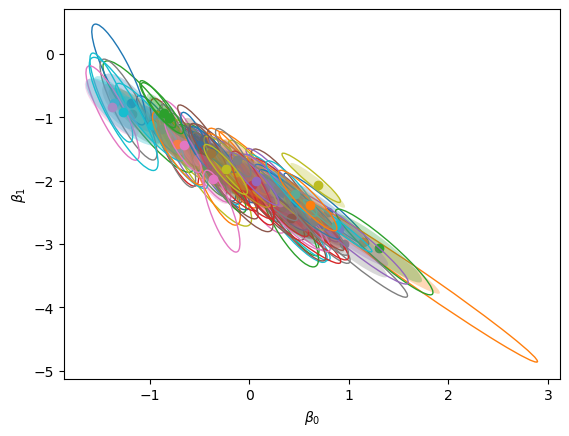

In [94]:
for i, r in enumerate(regions):
    p = plt.scatter(ths_eb[i,1], ths_eb[i,2])
    freqepid.confidence_ellipse(
        ths_eb[i,1:], covs_eb[i,1:,1:], n_std = chi_eb[i],
        facecolor=p.get_facecolor(), alpha=0.3)
    freqepid.confidence_ellipse(
        thats[i,1:], covs[i,1:,1:], n_std = chi_pa,
        edgecolor=p.get_facecolor(), facecolor='none', alpha=1)
plt.xlabel(r"$\beta_0$"); plt.ylabel(r"$\beta_1$"); #plt.legend(loc=(1.02,0))

(-4.0, 0.0)

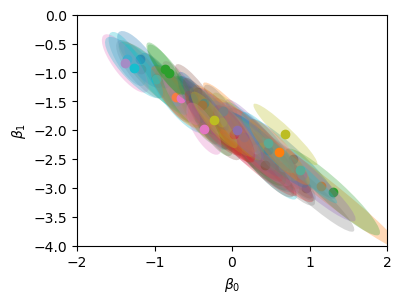

In [99]:
plt.figure(figsize=(4,3))

for i_region, (beta, th_eb, cov_eb) in enumerate(zip(betas, ths_eb, covs_eb)):
    p = plt.scatter(*(th_eb[1:]))
#     plt.arrow(*beta, *(th_eb[1:]-beta), width=0.005, 
#               length_includes_head=True,
#               color=p.get_facecolor(), alpha=1)
    freqepid.confidence_ellipse(
        th_eb[1:], cov_eb[1:,1:], n_std = chi_eb[i],
        facecolor=p.get_facecolor(), alpha=0.3)
plt.xlabel(r"$\beta_0$"); plt.ylabel(r"$\beta_1$")
plt.xlim([-2, 2]); plt.ylim([-4, 0])

In [96]:
X2_eb = ((ths_eb[:,1:] - betas)[:,None,:] @ np.linalg.pinv(covs_eb[:,1:,1:]) @ (ths_eb[:,1:] - betas)[:,:,None])[:,0,0]

In [97]:
np.mean(X2_eb < chi_eb**2)

0.98

# 4. Causal Forecasting

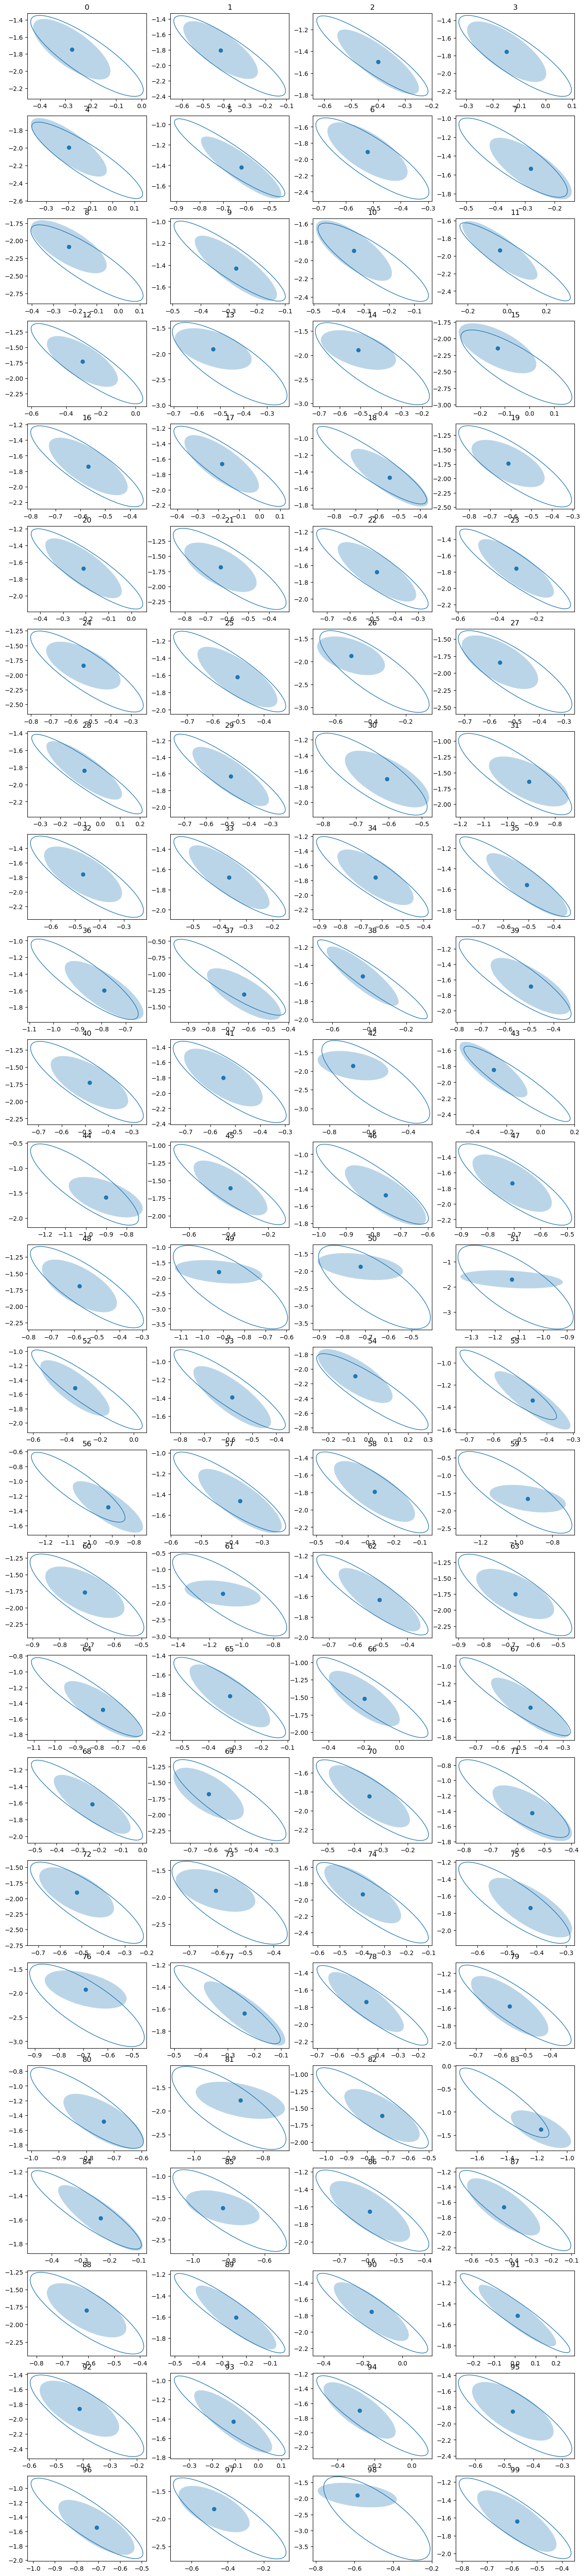

In [269]:
plt.figure(figsize=(16,int(num_region/4+1)*3))
for i, r in enumerate(regions):
    plt.subplot(int(num_region/4+1),4,i+1)
    
    p = plt.scatter(ths_eb[i,1], ths_eb[i,2])
    freqepid.confidence_ellipse(
        ths_eb[i,1:], covs_eb[i,1:,1:], n_std = chi_eb[i],
        facecolor=p.get_facecolor(), alpha=0.3)
    freqepid.confidence_ellipse(
        thats[i,1:], covs[i,1:,1:], n_std = chi_pa,
        edgecolor=p.get_facecolor(), facecolor='none', alpha=1)
    
    plt.title('%d'%i)

In [272]:
i = 22

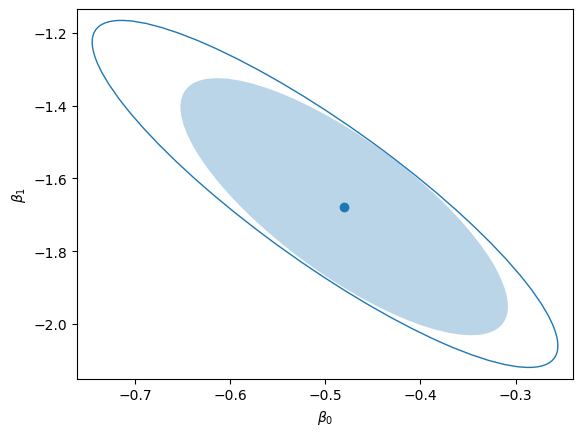

In [273]:
p = plt.scatter(ths_eb[i,1], ths_eb[i,2])
freqepid.confidence_ellipse(
    ths_eb[i,1:], covs_eb[i,1:,1:], n_std = chi_eb[i],
    facecolor=p.get_facecolor(), alpha=0.3)
freqepid.confidence_ellipse(
    thats[i,1:], covs[i,1:,1:], n_std = chi_pa,
    edgecolor=p.get_facecolor(), facecolor='none', alpha=1)
plt.xlabel(r"$\beta_0$"); plt.ylabel(r"$\beta_1$"); #plt.legend(loc=(1.02,0))

In [274]:
data_i = data[data['region']==i]
T = len(data_i)
A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
Y = data_i["death"].to_numpy()

In [275]:
Tf = 30
Af = np.zeros([Tf, d])

In [276]:
Af[:,0] = np.full(Tf, 1)
Af[:,1] = np.full(Tf, 0.5)

In [277]:
Ae = np.concatenate([A, Af], 0)

## vanilla CR

In [278]:
conf_pa, _, _ = \
model.confidence_EY(Ae, thats[i,0], thats[i,1:],
                    covs[i], chi_pa, verbose=True)

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


optimization at t = 1 finished, lapse: 1.630sec.
optimization at t = 2 finished, lapse: 1.503sec.
optimization at t = 3 finished, lapse: 1.350sec.
optimization at t = 4 finished, lapse: 1.720sec.
optimization at t = 5 finished, lapse: 1.708sec.
optimization at t = 6 finished, lapse: 0.894sec.
optimization at t = 7 finished, lapse: 0.334sec.
optimization at t = 8 finished, lapse: 0.353sec.
optimization at t = 9 finished, lapse: 0.217sec.
optimization at t = 10 finished, lapse: 0.497sec.
optimization at t = 11 finished, lapse: 0.386sec.
optimization at t = 12 finished, lapse: 0.295sec.
optimization at t = 13 finished, lapse: 0.227sec.
optimization at t = 14 finished, lapse: 0.325sec.
optimization at t = 15 finished, lapse: 0.163sec.
optimization at t = 16 finished, lapse: 0.165sec.
optimization at t = 17 finished, lapse: 0.153sec.
optimization at t = 18 finished, lapse: 0.134sec.
optimization at t = 19 finished, lapse: 0.125sec.
optimization at t = 20 finished, lapse: 0.110sec.
optimizat

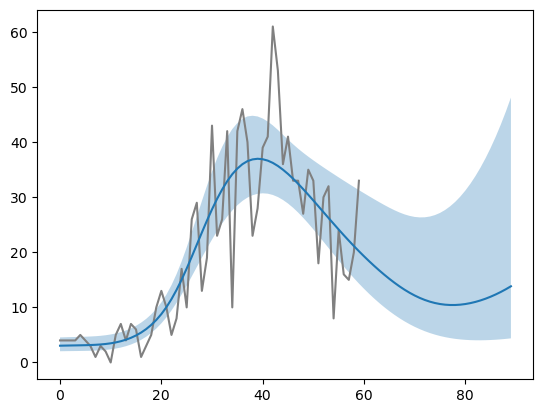

In [279]:
plt.plot(Y, color='grey')
plt.plot(model.predict_EY(Ae, thats[i,0], thats[i,1:]))
plt.fill_between(np.arange(T+Tf),
                 conf_pa[:,0], conf_pa[:,1], alpha=0.3)

## EBCR

In [280]:
conf_eb, _, _ = \
model.confidence_EY(Ae, ths_eb[i,0], ths_eb[i,1:],
                    covs_eb[i], chi_eb[i], verbose=True)

optimization at t = 1 finished, lapse: 0.797sec.
optimization at t = 2 finished, lapse: 0.408sec.
optimization at t = 3 finished, lapse: 0.902sec.
optimization at t = 4 finished, lapse: 0.446sec.
optimization at t = 5 finished, lapse: 0.758sec.
optimization at t = 6 finished, lapse: 0.253sec.
optimization at t = 7 finished, lapse: 0.158sec.
optimization at t = 8 finished, lapse: 0.203sec.
optimization at t = 9 finished, lapse: 0.260sec.
optimization at t = 10 finished, lapse: 0.198sec.
optimization at t = 11 finished, lapse: 0.187sec.
optimization at t = 12 finished, lapse: 0.106sec.
optimization at t = 13 finished, lapse: 0.168sec.
optimization at t = 14 finished, lapse: 0.149sec.
optimization at t = 15 finished, lapse: 0.173sec.
optimization at t = 16 finished, lapse: 0.210sec.
optimization at t = 17 finished, lapse: 0.129sec.
optimization at t = 18 finished, lapse: 0.097sec.
optimization at t = 19 finished, lapse: 0.088sec.
optimization at t = 20 finished, lapse: 0.132sec.
optimizat

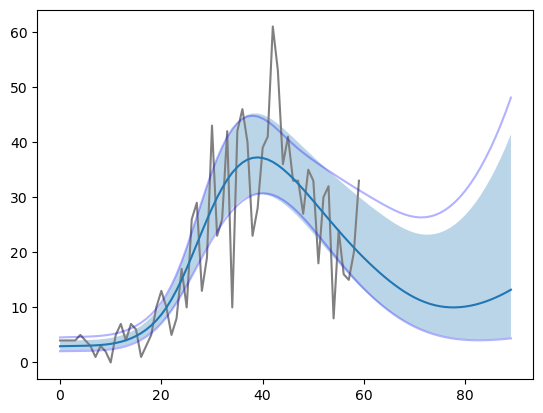

In [281]:
plt.plot(Y, color='grey')
plt.plot(model.predict_EY(Ae, ths_eb[i,0], ths_eb[i,1:]))
plt.fill_between(np.arange(T+Tf),
                 conf_eb[:,0], conf_eb[:,1], alpha=0.3)
plt.plot(conf_pa[:,0], color='blue', alpha=0.3)
plt.plot(conf_pa[:,1], color='blue', alpha=0.3)